In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
ts <- read_table(url("http://kdd.ics.uci.edu/databases/synthetic_control/synthetic_control.data"), col_names = FALSE)
ts$X49 <- NULL

Parsed with column specification:
cols(
  .default = col_double(),
  X49 = col_character()
)
See spec(...) for full column specifications.


In [ ]:
# compute DTW distances
library(dtw)#Dynamic Time Warping (DTW)

In [ ]:
distMatrix <- dist(ts, method= 'DTW')

In [17]:
# hierarchical clustering
hc <- hclust(distMatrix, method='average')
ts$cluster <- hc$order

In [ ]:
#pl <- plot(hc, labels=observedLabels, main="")


In [20]:
tsall <- ts %>% arrange(cluster) %>% 
  mutate(clusnum = gl(6,nrow(ts)/6, nrow(ts), labels = rep(1:6))) %>%
  group_by(clusnum) %>% summarise_all(mean) %>%
  select(-cluster) %>% gather(time, val, 2:49) %>% mutate(time = parse_number(time))

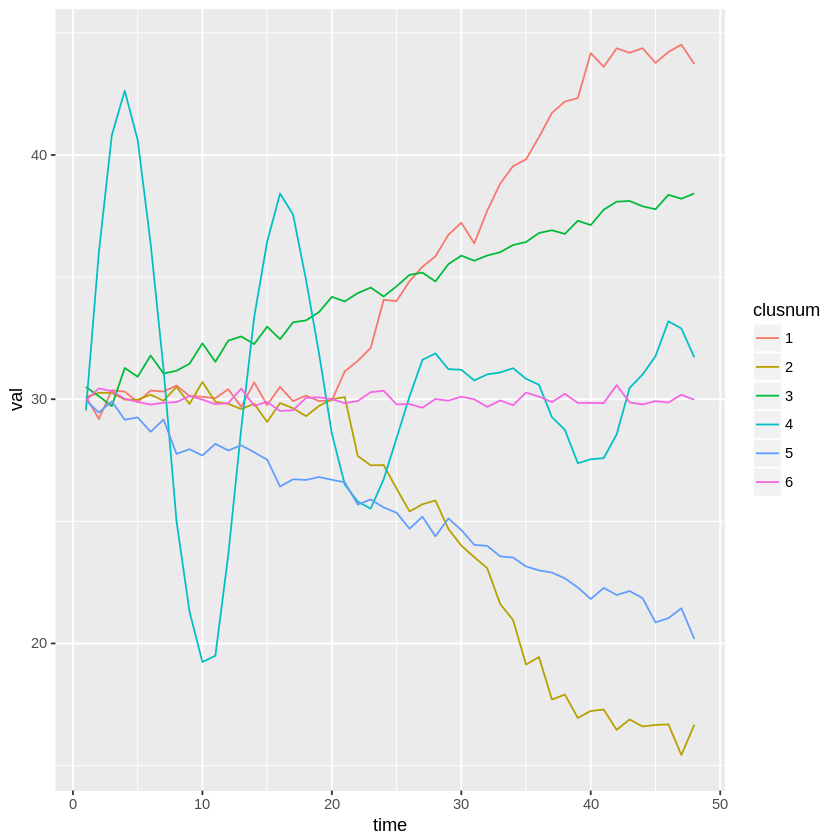

In [21]:
ggplot(data = tsall,  mapping = aes(x = time, y = val, group = clusnum, colour = clusnum)) + geom_line()